In [16]:
import torch
import os
import imageio
import matplotlib.pyplot as plt

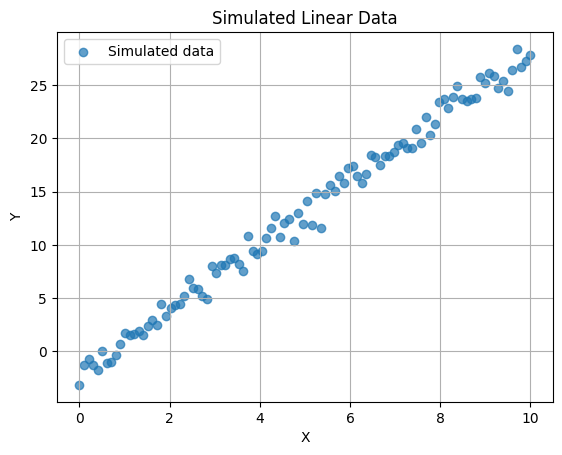

In [5]:
torch.manual_seed(50)

N = 100
w = 3
b = -2
noise_std = 1

#generate input feature X
X = torch.linspace(0,10,N).unsqueeze(1)  #changes the dimension of X

#generates a tensor of shape (N, 1)
#this scales the noise, changing its standard deviation from 1 to noise_std.
noise = torch.randn(N,1)*noise_std

y = w*X + b + noise

plt.scatter(X.numpy(),y.numpy(),label = 'Simulated data', alpha = 0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulated Linear Data')
plt.grid(True)
plt.legend()
plt.show()







In [26]:
epochs = 100    #Epoch : One full cycle through all the training data.
lr = 0.02       #


#Model parameters
w = torch.tensor([[0.0]])
b = torch.tensor([0.0])

losses = []
weights = []
frame_dir = "frames"
os.makedirs(frame_dir,exist_ok = True)

for epoch in range(epochs):

  y_pred = X @ w + b                #calculating y_pred
  loss = ((y_pred - y) ** 2).mean() #calculating loss

  #gradient computation
  grad_y_pred = (2 * ( y_pred - y)) / y.size(0)
  grad_w = X.T @ grad_y_pred
  grad_b = grad_y_pred.sum()

  #update parameters
  w -= lr * grad_w
  b -= lr * grad_b

  #logging
  losses.append(loss.item())  #item() is used to convert tensor having single value to scalar
  weights.append(w.item())


  #saving plots
  plt.figure()
  plt.scatter(X.numpy(),y.numpy(),alpha = 0.6,label = "Data")
  plt.plot(X.numpy(),y_pred.detach().numpy(),'r',label= f"Epoch {epoch}")
  plt.title(f"Epoch {epoch}")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  filename = os.path.join(frame_dir,f"frame_{epoch:03d}.png")
  plt.savefig(filename)
  plt.close()






In [27]:
gif_filename = "regression_training.gif"
with imageio.get_writer(gif_filename,mode = 'I',duration = 0.2) as writer:
  for epoch in range(epochs):
    image = imageio.imread(os.path.join(frame_dir,f"frame_{epoch:03d}.png"))
    writer.append_data(image)

print(f"✅ GIF saved as '{gif_filename}'")

/tmp/ipython-input-832336268.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(frame_dir,f"frame_{epoch:03d}.png"))


✅ GIF saved as 'regression_training.gif'


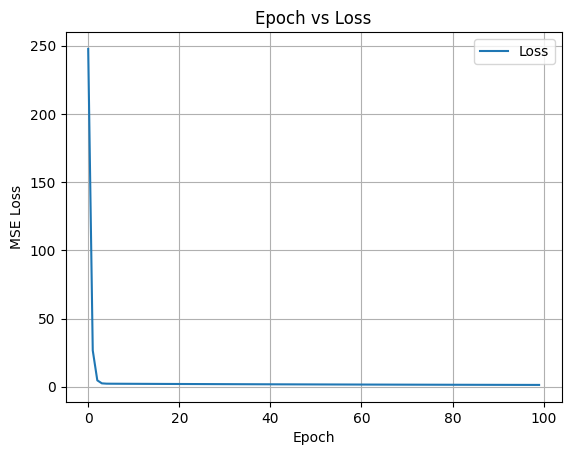

In [20]:
#Epoch vs Loss
plt.figure()
plt.plot(range(epochs),losses,label='Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Epoch vs Loss')
plt.grid(True)
plt.legend()
plt.show()


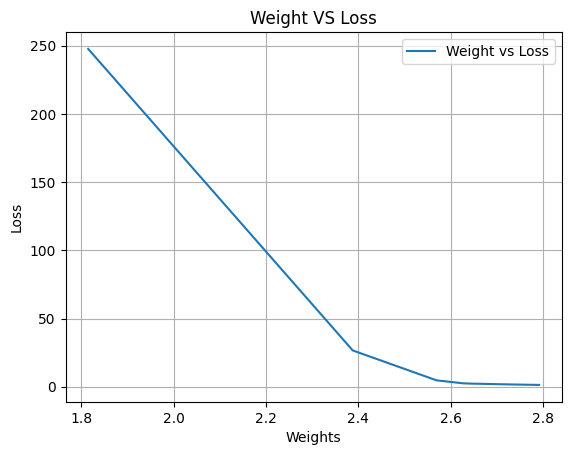

In [ ]:
plt.figure()
plt.plot(weights,losses,label = "Weight vs Loss")
plt.xlabel("Weights")
plt.ylabel("Loss")
plt.title('Weight VS Loss')
plt.grid(True)
plt.legend()
plt.show()